In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
alunos = pd.read_excel("provacao_alunos.xlsx")
alunos.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [9]:
alunos.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [10]:
alunos.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [11]:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


<AxesSubplot:xlabel='ano_2015', ylabel='Count'>

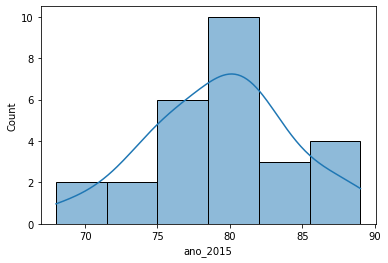

In [12]:
sns.histplot(data=alunos, x="ano_2015", kde=True)

<AxesSubplot:xlabel='ano_2016', ylabel='Count'>

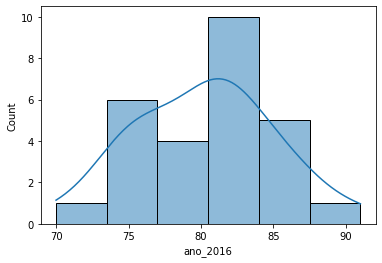

In [13]:
sns.histplot(data=alunos, x="ano_2016", kde=True)

<AxesSubplot:xlabel='ano_2015', ylabel='ano_2016'>

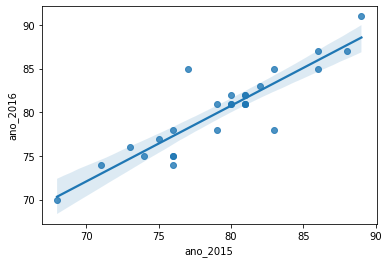

In [14]:
sns.regplot(x="ano_2015", y="ano_2016", data=alunos)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

alunos_norm = pd.DataFrame(scaler.fit_transform(alunos), index=alunos.index, columns=alunos.columns)

In [16]:
alunos_norm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [17]:
alunos_norm.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


In [18]:
import statsmodels.formula.api as smf

In [19]:
function = "ano_2016~ano_2015-1"
model = smf.ols(formula=function, data=alunos_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               ano_2016   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              707.2
Date:                Fri, 19 May 2023   Prob (F-statistic):                    2.21e-20
Time:                        17:28:56   Log-Likelihood:                          23.670
No. Observations:                  27   AIC:                                     -45.34
Df Residuals:                      26   BIC:                                     -44.04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
x = alunos_norm[["ano_2015"]]

y = alunos_norm[["ano_2016"]]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [22]:
r_sq = lr.score(x_train, y_train)
r_sq

0.8800910056640281

In [23]:
y_pred_train = lr.predict(x_train)
print("MAE:", metrics.mean_absolute_error(y_train, y_pred_train))
print("MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.06313092719197842
MSE: 0.006947385853516443
RMSE: 0.08335097991935334


In [24]:
y_pred_test = lr.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_test))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 0.10156392395533688
MSE: 0.02234792217796548
RMSE: 0.14949221443929941
